<a href="https://colab.research.google.com/github/aislam388/Transfer_Learning/blob/main/TL_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.applications.resnet50 import ResNet50
# resnet_weights = '../input/resnet50/resnet50_weigts_tf_dim_ordering_tf_kernels.h5'
resnet_model = ResNet50(weights='imagenet', include_top=False)
# _get_predictions(resnet_model)

94773248/94765736 [==============================] - 3s 0us/step


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
from PIL import Image


In [ ]:
def _get_features(img_path):
  img = image.load_img(img_path, target_size=(224,224))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)
  resnet_features = resnet_model.predict(img_data)
  return resnet_features


In [ ]:
basepath = "/content/drive/My Drive/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192/"
# basepath = "content/drive/MyDrive/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192"
class1 = os.listdir(basepath + "Positivepng/")
class2 = os.listdir(basepath + "Negativepng/")
print(class1)
print(class2)

['Unit6File_1.jpg', 'Unit6File_2.jpg', 'Unit6File_3.jpg', 'Unit6File_4.jpg', 'Unit6File_5.jpg', 'Unit6File_6.jpg', 'Unit6File_7.jpg', 'Unit6File_8.jpg', 'Unit6File_9.jpg', 'Unit6File_10.jpg', 'Unit6File_11.jpg', 'Unit6File_12.jpg', 'Unit6File_13.jpg', 'Unit6File_14.jpg', 'Unit6File_15.jpg', 'Unit6File_16.jpg', 'Unit6File_17.jpg', 'Unit6File_18.jpg', 'Unit6File_19.jpg', 'Unit6File_20.jpg', 'Unit6File_21.jpg', 'Unit6File_22.jpg', 'Unit7File_0.jpg', 'Unit7File_1.jpg', 'Unit7File_2.jpg', 'Unit7File_3.jpg', 'Unit7File_4.jpg', 'Unit7File_5.jpg', 'Unit7File_6.jpg', 'Unit7File_7.jpg', 'Unit7File_8.jpg', 'Unit7File_9.jpg', 'Unit7File_10.jpg', 'Unit7File_11.jpg', 'Unit7File_12.jpg', 'Unit7File_13.jpg', 'Unit7File_14.jpg', 'Unit7File_15.jpg', 'Unit7File_16.jpg', 'Unit7File_17.jpg', 'Unit7File_18.jpg', 'Unit7File_19.jpg', 'Unit7File_20.jpg', 'Unit7File_21.jpg', 'Unit7File_22.jpg', 'Unit7File_23.jpg', 'Unit7File_24.jpg', 'Unit7File_25.jpg', 'Unit7File_26.jpg', 'Unit7File_27.jpg', 'Unit7File_28.jpg'

In [ ]:
data = {'Positivepng': class1[:480], 
        'Negativepng': class2[:480], 
        'test': [class1[481], class2[481]]}

In [ ]:
features = {"Positivepng":[], "Negativepng":[], "test":[]}
test_features = []
test_imgs = []

for label, val in data.items():
  # print(label,val)
  for k, each in enumerate(val):
    # print(k,each)
    if label == "test" and k == 0:
      img_path = basepath + "/Positivepng/" + each 
      # print(img_path)
      test_imgs.append(img_path)
    elif label == "test" and k == 1:
      img_path = basepath + "/Negativepng/" + each
      # print(img_path)
      test_imgs.append(img_path)
    else: 
      img_path = basepath + label.title() + "/" + each
      # print(img_path)
      # print(label.title())
    feats = _get_features(img_path)
    # feats = np.resize(feats,(224,224,3))
    test_features.append(feats)
    # print("dim: ",feats.ndim, feats.shape, feats.dtype)
    # print(type(feats))

    features[label].append(feats.flatten())
# print(feats)

In [ ]:
print("dimension:",test_features[0].ndim, " shape:",test_features[0].shape, " Data_Type:", test_features[0].dtype)

dimension: 4  shape: (1, 7, 7, 2048)  Data_Type: float32


In [ ]:
import pandas as pd
test_label=[]
dataset = pd.DataFrame()
for label, feats in features.items():
    # print(label,feats)
    test_label.append(label)
    temp_df = pd.DataFrame(feats)
    temp_df['label'] = label
    dataset = dataset.append(temp_df, ignore_index=True)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,100313,100314,100315,100316,100317,100318,100319,100320,100321,100322,100323,100324,100325,100326,100327,100328,100329,100330,100331,100332,100333,100334,100335,100336,100337,100338,100339,100340,100341,100342,100343,100344,100345,100346,100347,100348,100349,100350,100351,label
0,0.0,0.0,0.0,0.502597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.187717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positivepng
1,0.0,0.0,0.0,0.859747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positivepng
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.566087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positivepng
3,0.0,0.0,0.0,0.860785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.204494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positivepng
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.667303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positivepng


In [ ]:
for i in test_label:
  print(i)

Positivepng
Negativepng
test


In [ ]:
y = dataset[dataset.label != 'test'].label
X = dataset[dataset.label != 'test'].drop('label', axis=1)


In [ ]:
print(y.shape, y.ndim, y.dtype)
print(X.shape, X.ndim, X.dtype)

(960,) 1 object


AttributeError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
# print(Xtrain,Xtest, ytrain,ytest)

In [ ]:
import time
start = time.time()
from sklearn import svm
from sklearn.svm import SVC
clf = SVC()
clf.fit(Xtrain, ytrain)
preds = clf.predict(Xtest)

print('Running time: %.4f seconds' % (time.time()-start))

Running time: 47.6755 seconds


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy on y_test:",accuracy_score(ytest, preds))

Accuracy on y_test: 0.9791666666666666


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Confusion Matrix')

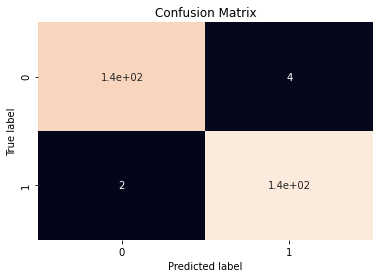

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(ytest, preds)
sns.heatmap(cm, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, preds))

              precision    recall  f1-score   support

 Negativepng       0.99      0.99      0.99       100
 Positivepng       0.99      0.99      0.99        92

    accuracy                           0.99       192
   macro avg       0.99      0.99      0.99       192
weighted avg       0.99      0.99      0.99       192



In [ ]:
# Parameters for Image Generator
params = {'rescale':1./255,  'rotation_range':40, 'zoom_range':0.15, 'width_shift_range':0.2, 'height_shift_range':0.2, 'shear_range':0.05, 'horizontal_flip':True, 'featurewise_std_normalization':True, 'featurewise_center':True, 'fill_mode':'nearest'}
# params = {'rescale':1./255, 'validation_split': 0.2}
# Image Data Generator configuration
image_gen = ImageDataGenerator(**params)
    
# Train Split
train_generator  = image_gen.flow_from_directory(
#  dataframe = dataset,
 directory= '/content/drive/My Drive/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192/Training/',
#  x_col=X,
#  y_col=y,
batch_size=5,
target_size=(224, 224),
color_mode="rgb",
class_mode="categorical",
shuffle=True,
seed=42)
    
# Validation Split
# dataframe=dataset,
valid_generator  = image_gen.flow_from_directory(
directory= '/content/drive/My Drive/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192/Validation/',
# x_col=X,
# y_col=y,
batch_size=5,
target_size=(224, 224),
color_mode="rgb",
class_mode="categorical",
shuffle=True,
seed=42)
    
# Test Split
test_generator  = image_gen.flow_from_directory(
directory= '/content/drive/My Drive/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192/Testing/',
batch_size=5,
target_size=(224, 224),
color_mode="rgb",
class_mode="categorical",
shuffle=True,
seed=42)

Found 962 images belonging to 2 classes.
Found 206 images belonging to 2 classes.
Found 208 images belonging to 2 classes.


In [ ]:
from sklearn.neural_network import 

In [ ]:
# CLASSIFYING
from sklearn.feature_selection import VarianceThreshold
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

model = MLPClassifier(hidden_layer_sizes=(100, 10))
pipeline = Pipeline([('low_variance_filter', VarianceThreshold()), ('model', model)])
pipeline.fit(X, y)

print ("Model Trained on pre-trained features")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.predict_proba(X_test)
                                                    

NameError: ignored

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
# ([[0.038..., 0.961...]])
clf.predict(X_test[:5, :])
# array([1, 0, 1, 0, 1])
clf.score(X_test, y_test)
# 0.8...

In [ ]:

# model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy']) 

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50)

In [ ]:
preds = pipeline.predict(features['test'])

f, ax = plt.subplots(1, 2)
for i in range(2):
  ax[i].imshow(Image.open(test_imgs[i]).resize((200, 200), Image.ANTIALIAS))
  ax[i].text(10, 180, 'Predicted: %s' % preds[i], color='k', backgroundcolor='red', alpha=0.8)
plt.show()

In [ ]:
print(pipeline.score(X_train))

In [ ]:
# for i in test_features:
  # print(len(i))

In [ ]:
import os

import sklearn
from sklearn.model_selection import cross_validate, GridSearchCV
# from sklearn import  grid_search
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn import svm


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
clf = svm.SVC()
clf.fit(X,y)
print(SVC())

NameError: ignored

In [ ]:
def train_svm_classifer(features, labels, model_output_path):
    """
    train_svm_classifer will train a SVM, saved the trained and SVM model and
    report the classification performance
    features: array of input features
    labels: array of labels associated with the input features
    model_output_path: path for storing the trained svm model
    """
    # save 20% of data for performance evaluation
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
    # cross_validate.train_test_split
    param = [
        {
            "kernel": ["linear"],
            "C": [1, 10, 100, 1000]
        },
        {
            "kernel": ["rbf"],
            "C": [1, 10, 100, 1000],
            "gamma": [1e-2, 1e-3, 1e-4, 1e-5]
        }
    ]

    # request probability estimation
    svm = SVC(probability=True)

    # 10-fold cross validation, use 4 thread as each fold and each parameter set can be train in parallel
    clf = GridSearchCV(svm, param,
            cv=10, n_jobs=4, verbose=3)

    clf.fit(X_train, y_train)

    

    print("\nBest parameters set:")
    print(clf.best_params_)

    y_predict=clf.predict(X_test)

    labels=sorted(list(set(labels)))
    print("\nConfusion matrix:")
    print("Labels: {0}\n".format(",".join(labels)))
    print(confusion_matrix(y_test, y_predict, labels=labels))

    print("\nClassification report:")
    print(classification_report(x_test, x_predict))

    if os.path.exists(model_output_path):
        joblib.dump(clf.best_estimator_, model_output_path)
    else:
        print("Cannot save trained svm model to {0}.".format(model_output_path))

In [ ]:
out_path = basepath + 'svm/'
# if os.path.exists(basepath+'svm'):
  # print("Done")
train_svm_classifer(X,y,out_path)